In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
 df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(0%)')
 df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.028872,-0.130254,-3.184231e+07,-3.115075e+07,-7184.203318,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.016772,-0.034656,-1.968379e+06,-1.924910e+06,-451.342112,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.015297,-0.094878,-6.059927e+07,-5.928166e+07,-13774.014902,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.014625,NaN,-2.290124e+06,-2.239814e+06,-510.210093,...,-12199.928822,-901.413470,-0.189720,-1.009642,-253.366805,-0.226133,-3.169102,-3.169102,-92.619013,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.006993,-0.050957,-3.997865e+07,-3.910761e+07,-9330.459280,...,-214438.078273,-4116.308632,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005


In [3]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
#airline_df.groupby("Company Name").describe
brewery_df.shape

(97, 34)

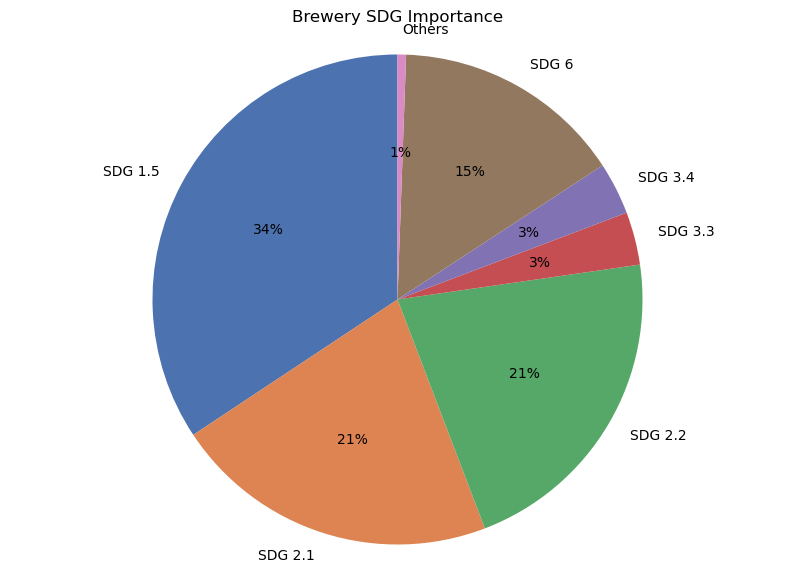

In [14]:
pie_chart_SDG = brewery_df.loc[:,"SDG 1.5":"SDG 15.5"]
# Calculate the sum of each column
abs_sums = pie_chart_SDG.abs().sum()

# Compute the percentages
total = abs_sums.sum()
percentages = (abs_sums / total) * 100

# Set a threshold (e.g., 1.0%) and filter out small values
threshold = 1.0
mask_small = percentages < threshold
small_sums = abs_sums[mask_small]

# Create "Others" category
if small_sums.sum() > 0:
    abs_sums = abs_sums[~mask_small]
    abs_sums['Others'] = small_sums.sum()

# Get the colors from Seaborn's "deep" palette
colors = sns.color_palette("deep", len(abs_sums))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(abs_sums, labels=abs_sums.index, colors=colors, autopct='%1.f%%', startangle=90)
plt.title("Brewery SDG Importance")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [12]:
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 10].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
filtered_df.shape

(70, 34)

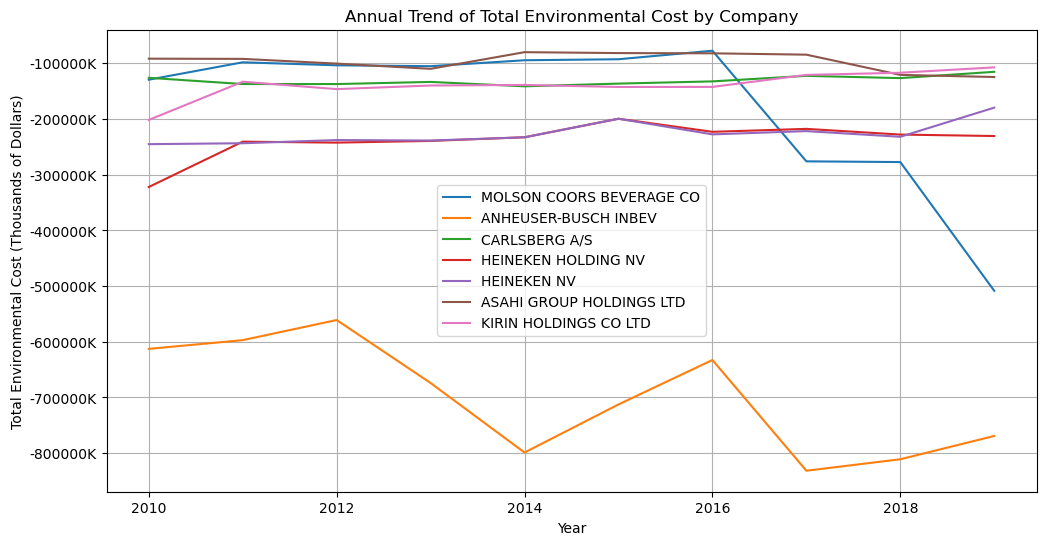

In [13]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1000:.0f}K'

# Create a FuncFormatter object using the thousands function
formatter = FuncFormatter(thousands)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Total Environmental Cost"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (Thousands of Dollars)")
plt.title("Annual Trend of Total Environmental Cost by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

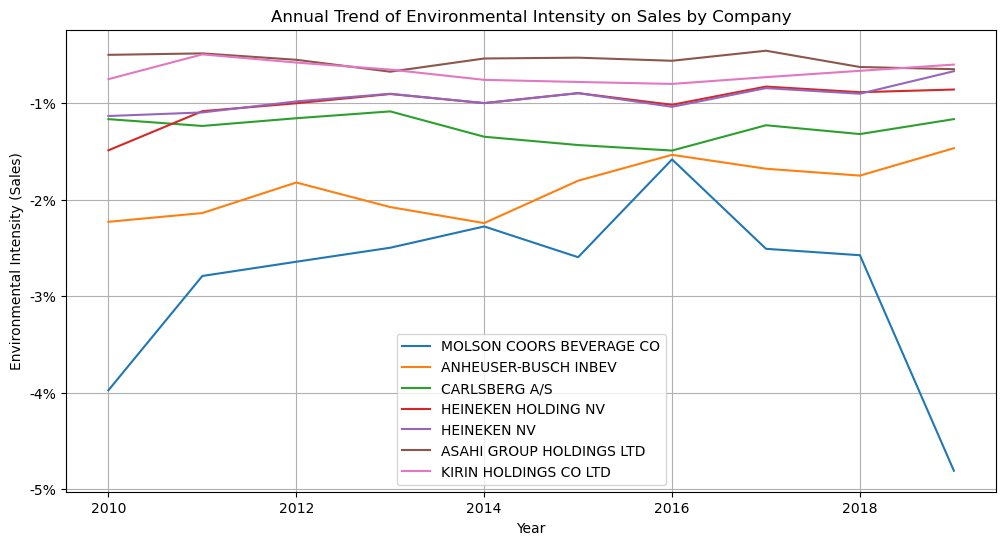

In [14]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Sales)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("Annual Trend of Environmental Intensity on Sales by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

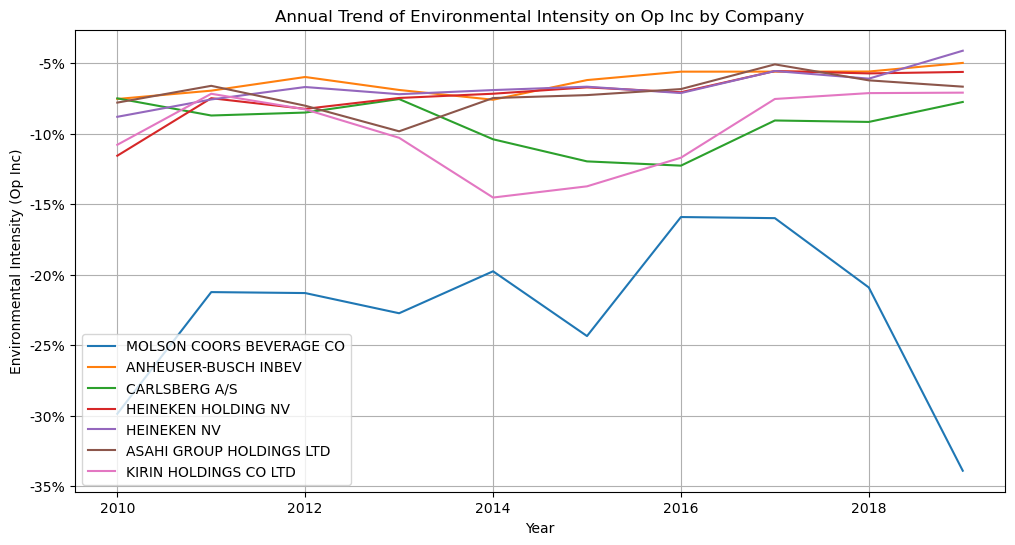

In [15]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Op Inc)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Op Inc)")
plt.title("Annual Trend of Environmental Intensity on Op Inc by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()